<a href="https://colab.research.google.com/github/DonAtharva/Exploratory-Data-Analysis-EDA-of-Formula-1-Winners/blob/main/F1_Winners(1950_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING AND INITIALISING

In [ ]:
df = pd.read_excel('winners.xlsx')

In [ ]:
df.head(5)

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70,1950
1,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70,1950
2,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100,1950
3,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138,1950
4,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42,1950


Here I only did 5 because there are more than 1400 entries

In [ ]:
df.info()  #every info
print()
print("shape:",df.shape)   #(row,column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1144 non-null   datetime64[ns]
 1   continent    1144 non-null   object        
 2   grand_prix   1144 non-null   object        
 3   circuit      1144 non-null   object        
 4   winner_name  1144 non-null   object        
 5   team         1144 non-null   object        
 6   time         1144 non-null   object        
 7   laps         1144 non-null   int64         
 8   year         1144 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 80.6+ KB

shape: (1144, 9)


In [ ]:
df.describe(include="all")

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
count,1144,1144,1144,1144,1144,1144,1144,1144.000000,1144.000000
unique,NaN,6,36,77,115,65,965,NaN,NaN
top,NaN,Europe,Italy,Autodromo Nazionale di Monza,Lewis Hamilton,Ferrari,01:41:05,NaN,NaN
freq,NaN,688,83,76,105,250,4,NaN,NaN
mean,1993-06-30 16:29:22.237762176,NaN,NaN,NaN,NaN,NaN,NaN,64.612762,1992.972028
min,1950-05-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1950.000000
25%,1977-02-22 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,1977.000000
50%,1995-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,1995.000000
75%,2011-09-28 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,72.000000,2011.000000
max,2025-08-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,2025.000000


In [ ]:
df.columns

Index(['date', 'continent', 'grand_prix', 'circuit', 'winner_name', 'team',
       'time', 'laps', 'year'],
      dtype='object')

#CHECKING AND CLEARING DUPLICATES

In [ ]:
dups = df.duplicated()
print("no of duplicates are = %d" % (dups.sum()))
df[dups]


no of duplicates are = 1


,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
1,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70,1950


In [ ]:
df.drop_duplicates(inplace=True)

Cleared Duplicates

In [ ]:
dups = df.duplicated()
print("no of duplicates are = %d" % (dups.sum()))
df[dups]
df.shape

no of duplicates are = 0


(1143, 9)

Now no of dups is = 0 (post removing)
also no of rows were 1144 in the beginning and now it got reduced to 1143

#CHECKING OUTLIERS

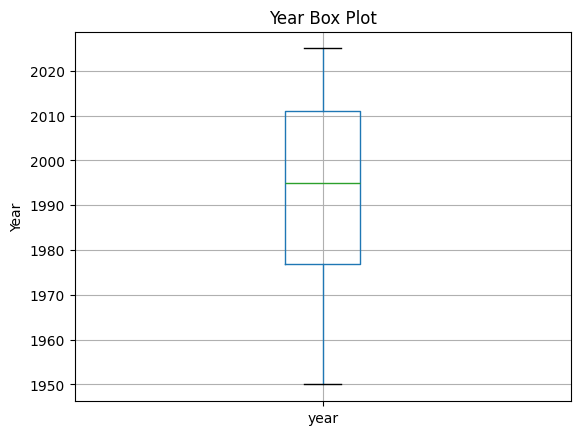

In [ ]:
df.boxplot('year')
plt.title('Year Box Plot')
plt.ylabel('Year')
plt.show()

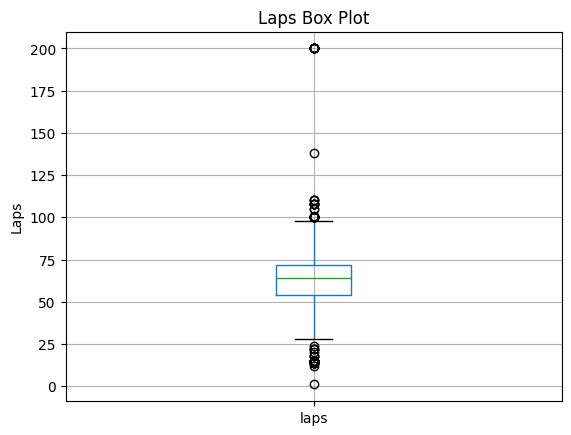

In [ ]:
df.boxplot('laps')
plt.title('Laps Box Plot')
plt.ylabel('Laps')
plt.show()

In [ ]:
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    high=Q3+(1.5*IQR)
    low=Q1-(1.5*IQR)
    return low,high

In [ ]:
low,high = remove_outliers(df['laps'])
df['laps']=np.where(df['laps']>high,high,df['laps'])
df['laps']=np.where(df['laps']<low,low,df['laps'])

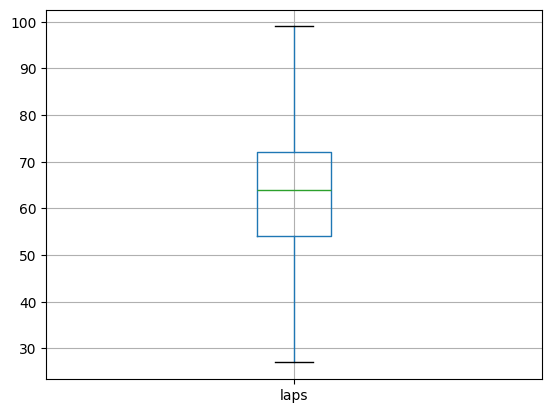

In [ ]:
df.boxplot('laps')
plt.show()

#MISSING VALUES

In [ ]:
df.isnull().sum()

,0
date,0
continent,0
grand_prix,0
circuit,0
winner_name,0
team,0
time,0
laps,0
year,0


In [ ]:
# Based on the output of df.isnull().sum(), there are no missing values in the 'laps' column,
# so this code to fill missing values is not necessary.
# median1=df['laps'].median()
# df['laps'].replace(np.nan.median1,inplace=True)
# #this is to fix missing values by median(numerical)
# mode1=df['laps']=df['laps'].mode().values[0]
# df['laps']=df['laps'].replace(np.nan,mode1)
# #this is to fix missing values by mode(categorical)

# UNIVIRATE AND BIVARATE ANALYSIS

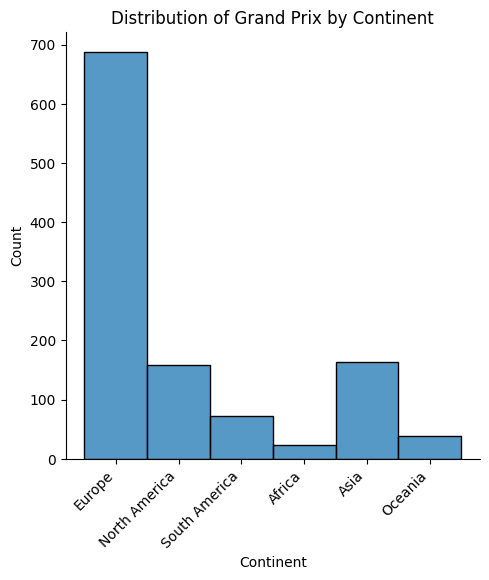

In [ ]:
sns.displot(df.continent, bins=20)
plt.title('Distribution of Grand Prix by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.show()

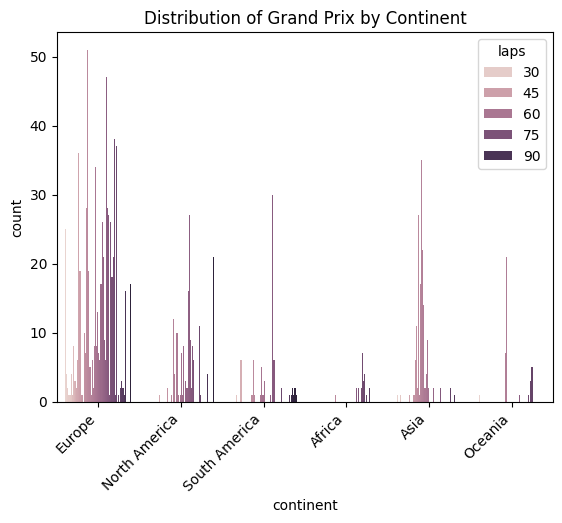

In [ ]:
sns.countplot(x='continent',hue='laps', data=df)
plt.title('Distribution of Grand Prix by Continent')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.show()

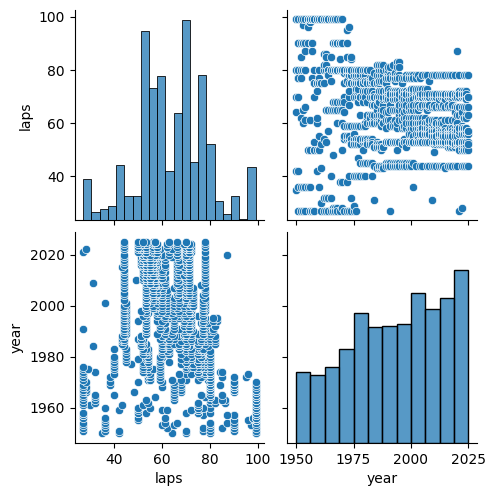

In [ ]:
sns.pairplot(df)

#SCALING AND NORMALISATION

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale

StandardScaler()

here we dont need scaling and normalisation according to data we but we can convert the data using folllowing code
also the above code is used for scaling

In [ ]:
"""
df['date']=std_scale.fit_transform(df[['date']])
df['year']=std_scale.fit_transform(df[['year']])
df['laps']=std_scale.fit_transform(df[['laps']])"
"""

'\ndf[\'date\']=std_scale.fit_transform(df[[\'date\']])\ndf[\'year\']=std_scale.fit_transform(df[[\'year\']])\ndf[\'laps\']=std_scale.fit_transform(df[[\'laps\']])"\n'

# CORRELATION

In [ ]:
woww = df.select_dtypes(include=['float64', 'int64'])
woww.corr()

,laps,year
laps,1.000000,-0.224975
year,-0.224975,1.000000


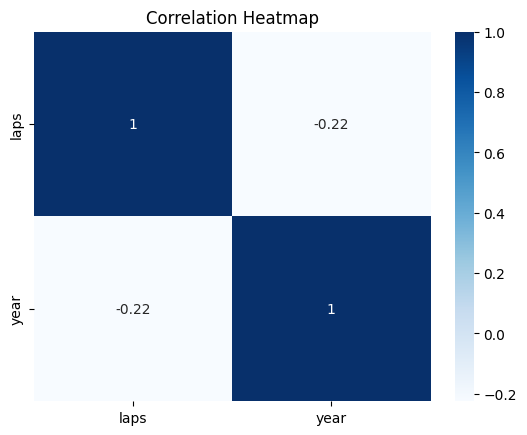

In [ ]:
sns.heatmap(woww.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# ENCODING

In [ ]:
df.head()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
2,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,99.0,1950
3,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,99.0,1950
4,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
5,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950


Usually we do encoding on datasets but this type of dataset does'nt need encoding but I have shown the code to do if you have to. I use one hot encoding

In [ ]:
df_encoded = pd.get_dummies(df, columns=['continent', 'grand_prix', 'circuit', 'winner_name', 'team'])
display(df_encoded.head())

,date,time,laps,year,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,...,team_Shadow Ford,team_Stewart Ford,team_Tyrrell Ford,team_Vanwall,team_Watson Offenhauser,team_Williams BMW,team_Williams Ford,team_Williams Honda,team_Williams Renault,team_Wolf Ford
0,1950-05-13,02:13:23,70.0,1950,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1950-05-21,03:13:18,99.0,1950,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1950-05-30,02:46:55,99.0,1950,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1950-06-04,02:02:53,42.0,1950,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1950-06-18,02:47:26,35.0,1950,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1143
Columns: 303 entries, date to team_Wolf Ford
dtypes: bool(299), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 378.4+ KB


This code here created 303 colums of type 'BOOLEAN'. So we can still encode but if the data is gender based or has only yes/no type stuff then its easier